# Guardar datos en NumPy

Ahora, nos enfocaremos en la como  guardar nuestros datos procesados de NumPy. Aprenderás el uso de las funciones **np.save** y **np.load**, que son clave para almacenar arreglos NumPy en archivos con formato .npy, y así poder cargarlos con facilidad ya sea en futuras sesiones o en diferentes libretas de trabajo.

Te enseñaremos a emplear np.save para preservar tus arreglos NumPy, asegurando que tus datos se mantengan intactos en archivos *.npy*. Además, con np.load, podrás recuperar esos datos siempre que lo requieras, facilitando la continuidad de tu trabajo. Estas herramientas no solo te ahorrarán tiempo valioso, sino que también garantizarán que mantengas la estructura de ellos.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob as glob

In [2]:
vels = glob.glob("../data/obstacle/*.png")
vels

['../data/obstacle/u_norm_183.png',
 '../data/obstacle/u_norm_182.png',
 '../data/obstacle/u_norm_180.png',
 '../data/obstacle/u_norm_181.png',
 '../data/obstacle/u_norm_185.png',
 '../data/obstacle/u_norm_191.png',
 '../data/obstacle/u_norm_190.png',
 '../data/obstacle/u_norm_184.png',
 '../data/obstacle/u_norm_192.png',
 '../data/obstacle/u_norm_186.png',
 '../data/obstacle/u_norm_179.png',
 '../data/obstacle/u_norm_178.png',
 '../data/obstacle/u_norm_187.png',
 '../data/obstacle/u_norm_175.png',
 '../data/obstacle/u_norm_174.png',
 '../data/obstacle/u_norm_189.png',
 '../data/obstacle/u_norm_176.png',
 '../data/obstacle/u_norm_177.png',
 '../data/obstacle/u_norm_188.png',
 '../data/obstacle/u_norm_173.png']

In [3]:
def transforma_imagen(imagen):
    img = Image.open(imagen)
    img = np.array(img)
    img = img[:,:,:3]
    img = np.mean(img,axis=2)
    return img


(894, 4800)

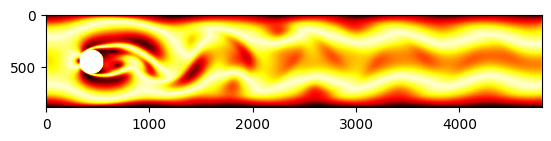

In [4]:
imagen = transforma_imagen(vels[10])
fig, ax = plt.subplots()
ax.imshow(imagen,cmap="hot")
imagen.shape

In [5]:
multiples  = np.dstack([transforma_imagen(vel) for vel in vels])
promedio   = np.mean(multiples,axis=2)
desviacion = np.std(np.dstack([transforma_imagen(vel) for vel in vels]) ,axis=2)


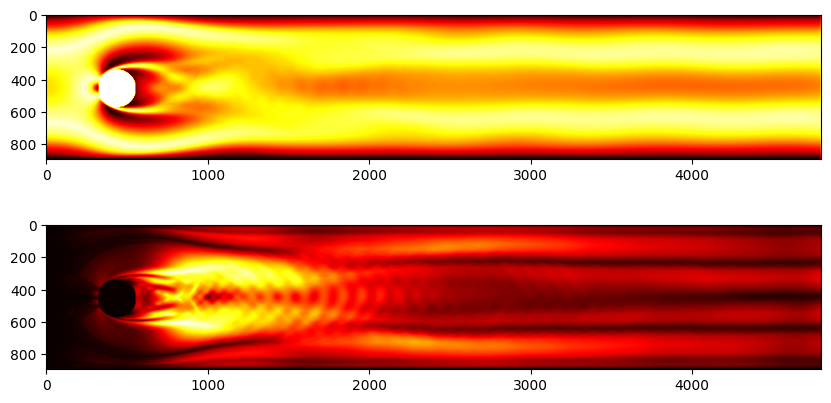

In [6]:
fig, ax = plt.subplots(2,figsize=(10,5))

ax[0].imshow(promedio,  cmap="hot")
ax[1].imshow(desviacion,cmap="hot")


In [7]:
promedio.shape

(894, 4800)

In [8]:
np.save("../data/promedio.npy",promedio)

In [9]:
prom = np.load("../data/promedio.npy")
prom.shape

(894, 4800)

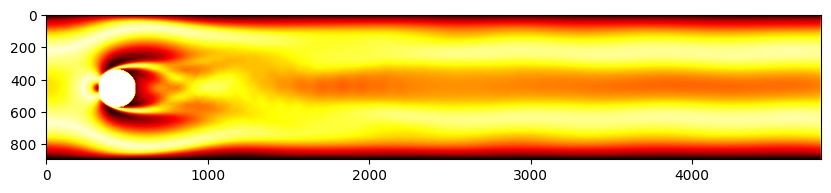

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

ax.imshow(prom,  cmap="hot")